# Employee salaries for different job roles

## Import Package/Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from scipy import stats

## Data Wrangling
### Gathering Data

In [2]:
salaries_df = pd.read_csv("Employee_Salaries_for_different_job_roles/ds_salaries.csv")
salaries_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Assessing Data

In [3]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


There are no anomalies in the amount of data and data types.

In [4]:
salaries_df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [5]:
salaries_df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no missing values.

In [6]:
print("Number of duplicates: ", salaries_df.duplicated().sum())

Number of duplicates:  0


In [7]:
salaries_df.shape

(607, 12)

In [8]:
salaries_df.describe(include='all')

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


### Cleaning Data

In [9]:
salaries_df = salaries_df.drop(columns="Unnamed: 0")
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Exploratory Data Analysis (EDA)

In [10]:
salaries_df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
509,2022,MI,FT,Applied Data Scientist,157000,USD,157000,US,100,US,L
138,2021,SE,FT,Principal Data Scientist,220000,USD,220000,US,0,US,L
484,2022,SE,FT,Data Engineer,210000,USD,210000,US,100,US,M
512,2022,EN,FT,Data Engineer,65000,USD,65000,US,100,US,S
169,2021,MI,FT,Data Architect,150000,USD,150000,US,100,US,L


In [11]:
salaries_df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [12]:
experience_level_df = salaries_df.groupby("experience_level").size().reset_index(name="count").sort_values(by="count",ascending=False)
experience_level_df

,experience_level,count
3,SE,280
2,MI,213
0,EN,88
1,EX,26


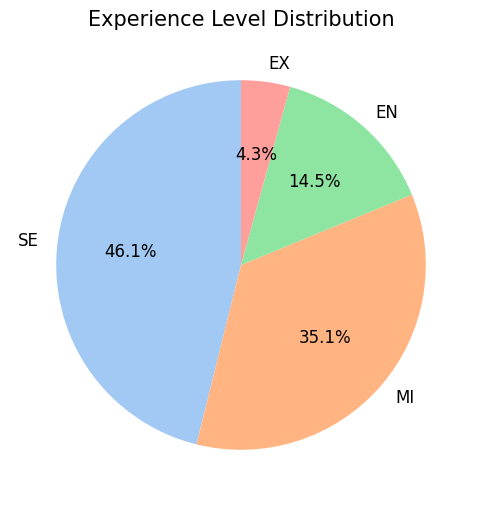

In [13]:
plt.figure(figsize=(6, 6))
sizes = experience_level_df["count"]
colors = sns.color_palette("pastel", len(sizes))
plt.pie(
    sizes, 
    labels = experience_level_df["experience_level"], 
    autopct = '%1.1f%%', 
    startangle = 90, 
    colors = colors, 
    textprops = {'fontsize': 12}
)
plt.title("Experience Level Distribution", fontsize=15, loc="center")
plt.show()

In [14]:
employment_type_df = salaries_df.groupby(by="employment_type").size().reset_index(name="count").sort_values(by="count",ascending=False)
employment_type_df

,employment_type,count
2,FT,588
3,PT,10
0,CT,5
1,FL,4


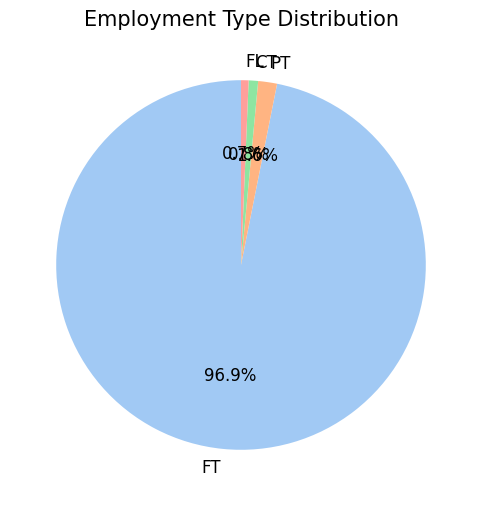

In [15]:
plt.figure(figsize=(6, 6))
sizes = employment_type_df["count"]
colors = sns.color_palette("pastel", len(sizes))
plt.pie(
    sizes, 
    labels = employment_type_df["employment_type"], 
    autopct = '%1.1f%%', 
    startangle = 90, 
    colors = colors, 
    textprops = {'fontsize': 12}
)
plt.title("Employment Type Distribution", fontsize=15, loc="center")
plt.show()

In [16]:
jobtitle_trend_df = salaries_df.groupby(by="job_title").size().reset_index(name="count").sort_values(by="count",ascending=False)
jobtitle_trend_df

,job_title,count
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
41,Machine Learning Scientist,8
15,Data Analytics Manager,7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7088\509392620.py:3: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


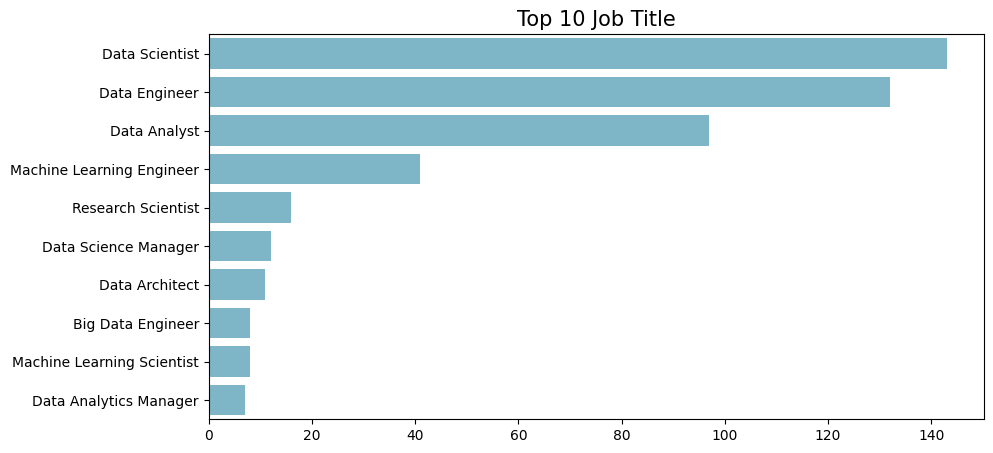

In [17]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"]
sns.barplot(
    x="count",
    y="job_title",
    data=jobtitle_trend_df.head(10),
    hue="job_title",
    palette=colors_,
    legend=False
)
plt.title("Top 10 Job Title", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.show()

In [18]:
companylocation_trend_df = salaries_df.groupby(by="company_location").size().reset_index(name="count").sort_values(by="count",ascending=False)
companylocation_trend_df

,company_location,count
48,US,355
18,GB,47
6,CA,30
12,DE,28
25,IN,24
17,FR,15
16,ES,14
19,GR,11
29,JP,6
2,AT,4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7088\1010029171.py:3: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


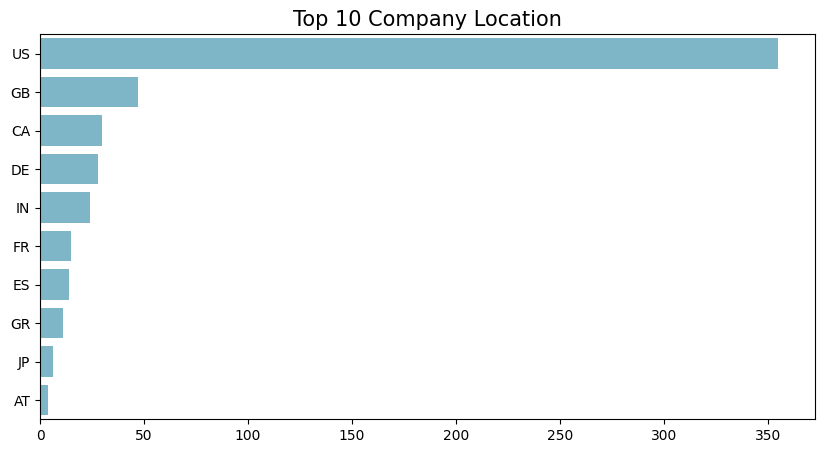

In [19]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"]
sns.barplot(
    x="count",
    y="company_location",
    data=companylocation_trend_df.head(10),
    hue="company_location",
    palette=colors_,
    legend=False
)
plt.title("Top 10 Company Location", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.show()

In [20]:
employeeresidence_trend_df = salaries_df.groupby(by="employee_residence").size().reset_index(name="count").sort_values(by="count",ascending=False)
employeeresidence_trend_df

,employee_residence,count
55,US,332
20,GB,44
27,IN,30
8,CA,29
14,DE,25
19,FR,18
18,ES,15
21,GR,13
32,JP,7
43,PK,6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7088\3625366911.py:3: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


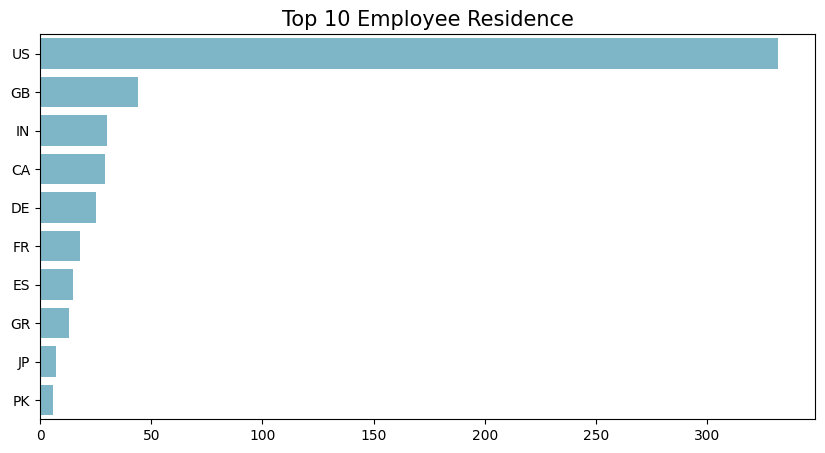

In [21]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"]
sns.barplot(
    x="count",
    y="employee_residence",
    data=employeeresidence_trend_df.head(10),
    hue="employee_residence",
    palette=colors_,
    legend=False
)
plt.title("Top 10 Employee Residence", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.show()

In [22]:
companysize_df = salaries_df.groupby(by="company_size").size().reset_index(name="count").sort_values(by="count",ascending=False)
companysize_df

,company_size,count
1,M,326
0,L,198
2,S,83


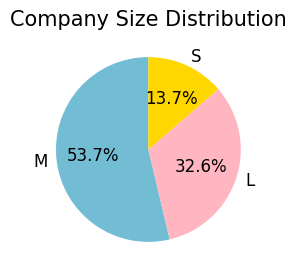

In [23]:
plt.figure(figsize=(3, 3))
colors = ["#72BCD4", "#FFB6C1", "#FFD700"]
sizes = companysize_df["count"]
plt.pie(
    sizes, 
    labels = companysize_df["company_size"], 
    autopct = '%1.1f%%', 
    startangle = 90, 
    colors = colors, 
    textprops = {'fontsize': 12}
)
plt.title("Company Size Distribution", fontsize=15, loc="center")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7088\1077401308.py:3: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


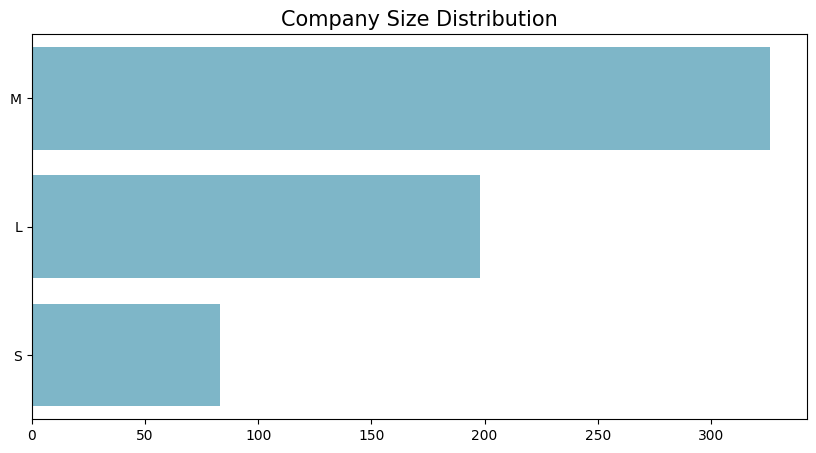

In [24]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"]
sns.barplot(
    x="count",
    y="company_size",
    data=companysize_df,
    hue="company_size",
    palette=colors_,
    legend=False
)
plt.title("Company Size Distribution", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.show()

In [25]:
remote_ratio_df = salaries_df.groupby(by="remote_ratio").size().reset_index(name="count").sort_values(by="count",ascending=False)
remote_ratio_df

,remote_ratio,count
2,100,381
0,0,127
1,50,99


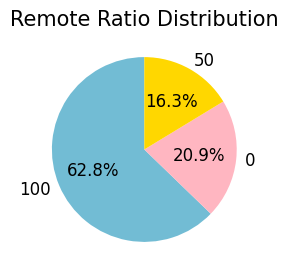

In [26]:
plt.figure(figsize=(3, 3))
colors = ["#72BCD4", "#FFB6C1", "#FFD700"]
sizes = remote_ratio_df["count"]
plt.pie(
    sizes, 
    labels = remote_ratio_df["remote_ratio"], 
    autopct = '%1.1f%%', 
    startangle = 90, 
    colors = colors, 
    textprops = {'fontsize': 12}
)
plt.title("Remote Ratio Distribution", fontsize=15, loc="center")
plt.show()

In [27]:
salaries_df.groupby(by="salary_currency").size().reset_index(name="count").sort_values(by="count",ascending=False)

,salary_currency,count
16,USD,398
7,EUR,95
8,GBP,44
10,INR,27
2,CAD,18
11,JPY,3
13,PLN,3
15,TRY,3
0,AUD,2
1,BRL,2


In [28]:
salaries_df.groupby(by=["job_title", "experience_level", "employment_type"]).agg({
    "salary_in_usd": ["min", "mean", "max"]
}).assign(count=lambda x: salaries_df.groupby(["job_title", "experience_level", "employment_type"]).size())

salary_in_usd  \
                                                                         min   
job_title                     experience_level employment_type                 
3D Computer Vision Researcher MI               PT                       5409   
AI Scientist                  EN               FT                      18053   
                                               PT                      12000   
                              MI               FT                     120000   
                              SE               FT                      55000   
...                                                                      ...   
Product Data Analyst          MI               FT                       6072   
Research Scientist            EN               FT                      42000   
                              MI               FT                      56738   
                              SE               FT                      50000   
Staff Data Scientist          SE               CT                     105000   

                                                                               \
                                                                         mean   
job_title                     experience_level employment_type                  
3D Computer Vision Researcher MI               PT                 5409.000000   
AI Scientist                  EN               FT                31974.500000   
                                               PT                12000.000000   
                              MI               FT               160000.000000   
                              SE               FT                55000.000000   
...                                                                       ...   
Product Data Analyst          MI               FT                13036.000000   
Research Scientist            EN               FT                86132.000000   
                              MI               FT               136498.142857   
                              SE               FT                88859.400000   
Staff Data Scientist          SE               CT               105000.000000   

                                                                       count  
                                                                   max        
job_title                     experience_level employment_type                
3D Computer Vision Researcher MI               PT                 5409     1  
AI Scientist                  EN               FT                45896     2  
                                               PT                12000     2  
                              MI               FT               200000     2  
                              SE               FT                55000     1  
...                                                                ...   ...  
Product Data Analyst          MI               FT                20000     2  
Research Scientist            EN               FT               120000     4  
                              MI               FT               450000     7  
                              SE               FT               144000     5  
Staff Data Scientist          SE               CT               105000     1  

[117 rows x 4 columns]

In [29]:
salaries_df.groupby(by=["job_title","experience_level","employment_type"]).agg(
    count=("salary_in_usd", "size"),
    min_salary=("salary_in_usd", "min"),
    mean_salary=("salary_in_usd", "mean"),
    max_salary=("salary_in_usd", "max")
).reset_index().sort_values(by="count", ascending=False)

,job_title,experience_level,employment_type,count,min_salary,mean_salary,max_salary
47,Data Engineer,SE,FT,63,25000,137035.841270,243900
62,Data Scientist,SE,FT,61,20171,152971.016393,412000
61,Data Scientist,MI,FT,59,2859,81734.711864,200000
34,Data Analyst,SE,FT,54,60000,111922.629630,200000
45,Data Engineer,MI,FT,50,4000,88250.840000,206699
...,...,...,...,...,...,...,...
104,NLP Engineer,MI,FT,1,37236,37236.000000,37236
103,Marketing Data Analyst,SE,FT,1,88654,88654.000000,88654
110,Principal Data Scientist,MI,FT,1,151000,151000.000000,151000
109,Principal Data Scientist,EX,CT,1,416000,416000.000000,416000


In [30]:
salaries_df.groupby(["experience_level", "job_title", "remote_ratio"]).size().reset_index(name="count").sort_values(by=["experience_level", "job_title", "remote_ratio"])

,experience_level,job_title,remote_ratio,count
0,EN,AI Scientist,50,1
1,EN,AI Scientist,100,3
2,EN,Applied Data Scientist,0,1
3,EN,Applied Machine Learning Scientist,100,1
4,EN,BI Data Analyst,50,1
...,...,...,...,...
162,SE,Principal Data Scientist,0,1
163,SE,Principal Data Scientist,100,4
164,SE,Research Scientist,50,4
165,SE,Research Scientist,100,1


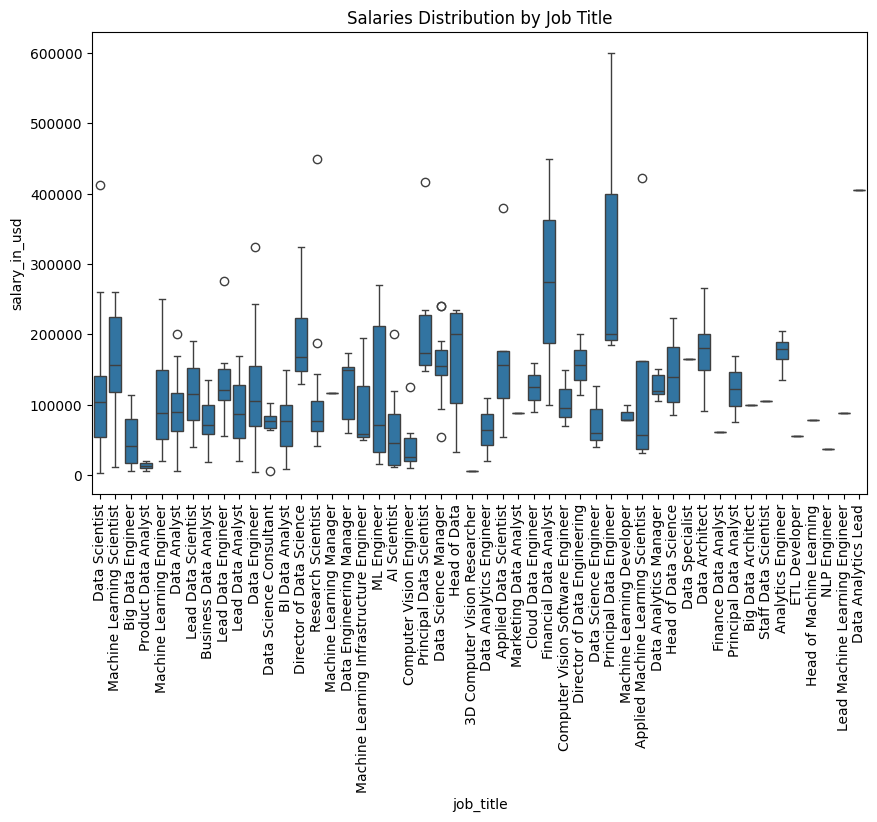

In [31]:
# Salaries distribution by job title
plt.figure(figsize=(10,6))
sns.boxplot(data=salaries_df, x="job_title", y="salary_in_usd")
plt.title("Salaries Distribution by Job Title")
plt.xticks(rotation=90)
plt.show()

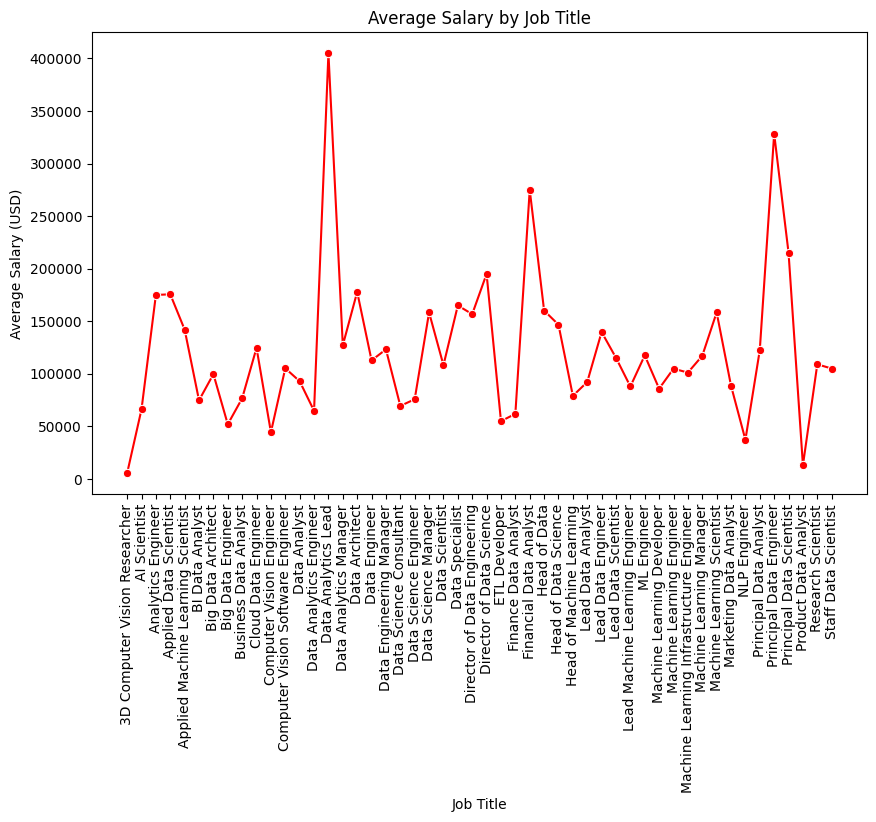

In [32]:
# Salary trend
salary_trend = salaries_df.groupby("job_title")["salary_in_usd"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=salary_trend, x="job_title", y="salary_in_usd", marker="o", color="red")
plt.title("Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=90)
plt.show()

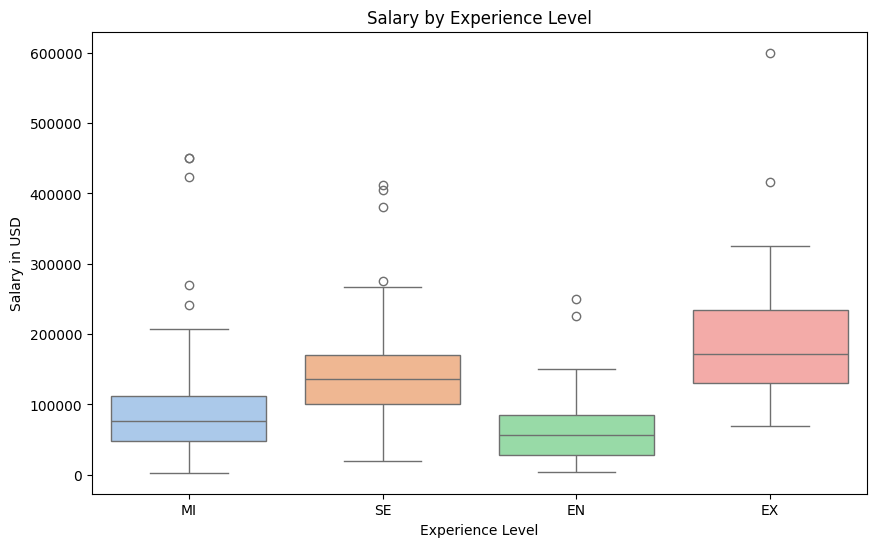

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salaries_df, x="experience_level", y="salary_in_usd", hue="experience_level", legend=False, palette="pastel")
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.show()

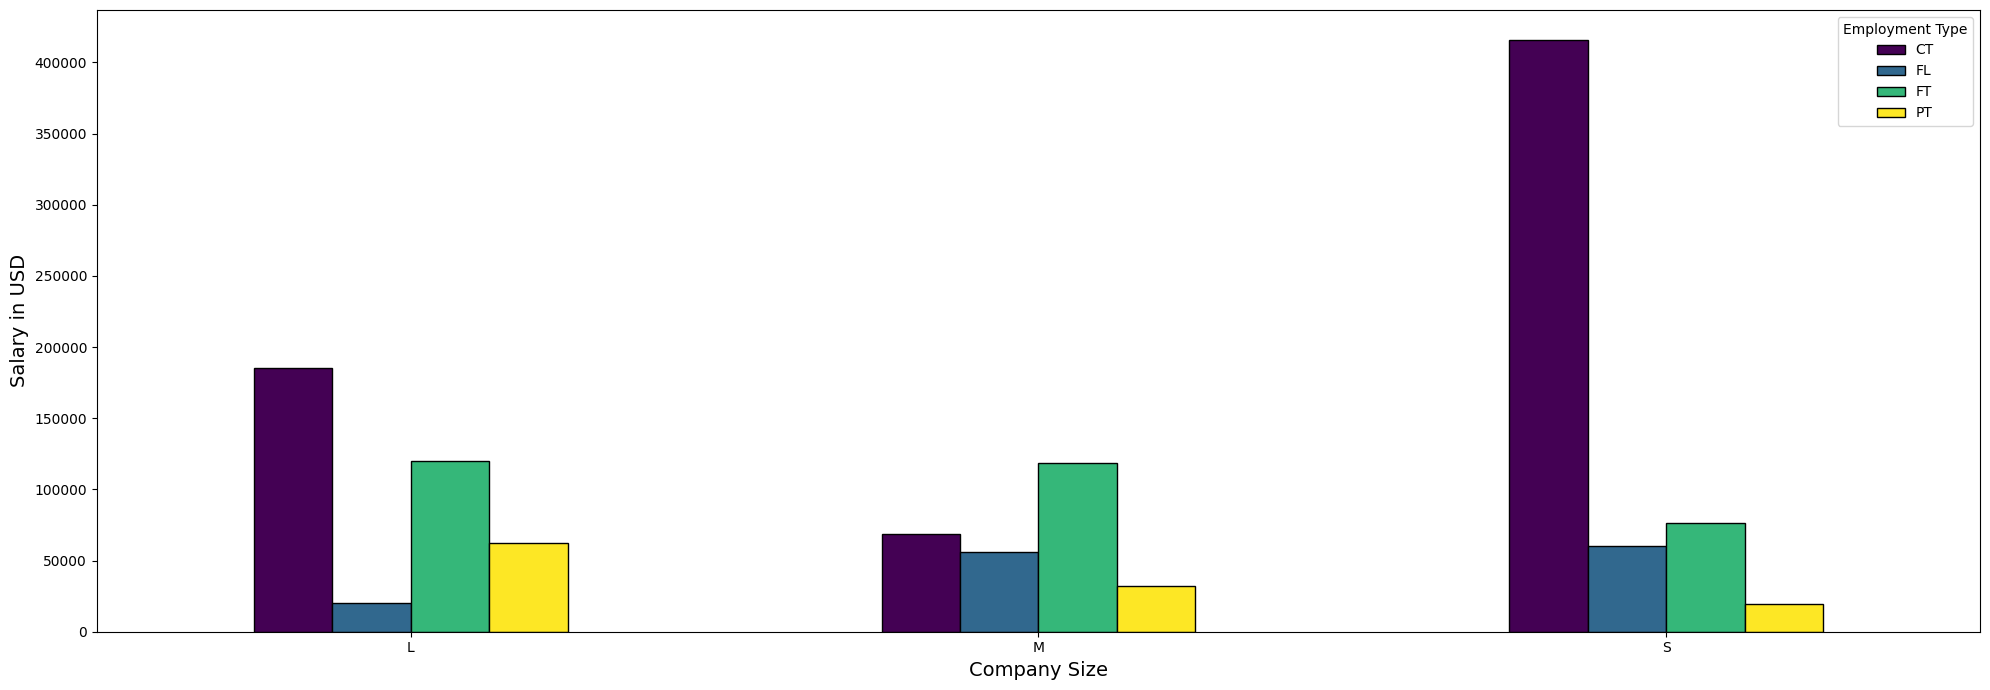

In [34]:
avg = salaries_df.groupby(["company_size", "employment_type"])["salary_in_usd"].mean().unstack()

plt.figure(figsize=(20, 7))
avg.plot(kind='bar', ax=plt.gca(), colormap='viridis', edgecolor='black')

plt.xlabel("Company Size", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Employment Type")
plt.tight_layout()

plt.show()

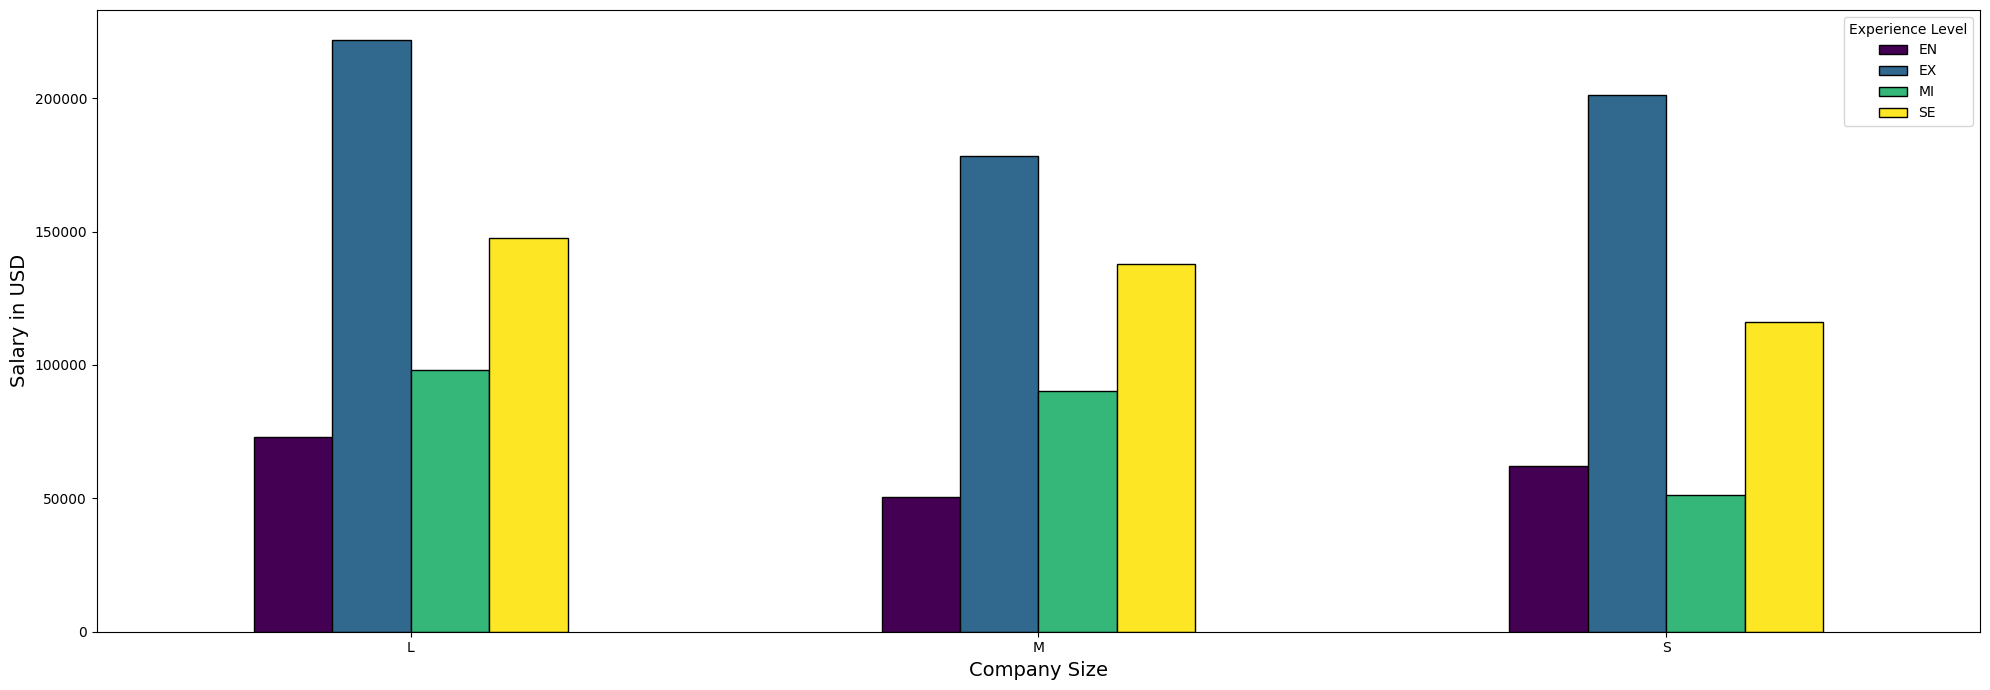

In [35]:
avg = salaries_df.groupby(["company_size", "experience_level"])["salary_in_usd"].mean().unstack()

plt.figure(figsize=(20, 7))
avg.plot(kind='bar', ax=plt.gca(), colormap='viridis', edgecolor='black')

plt.xlabel("Company Size", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Experience Level")
plt.tight_layout()

plt.show()

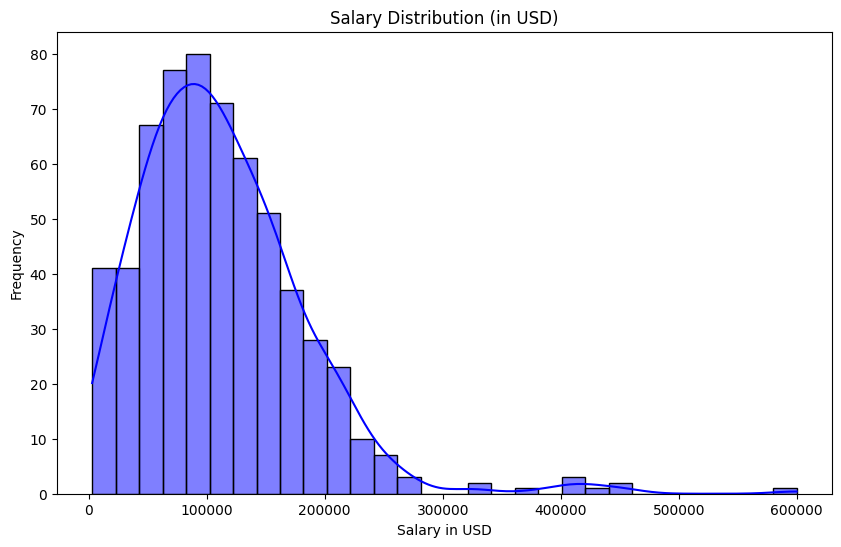

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(salaries_df["salary_in_usd"], kde=True, bins=30, color='blue')
plt.title("Salary Distribution (in USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()

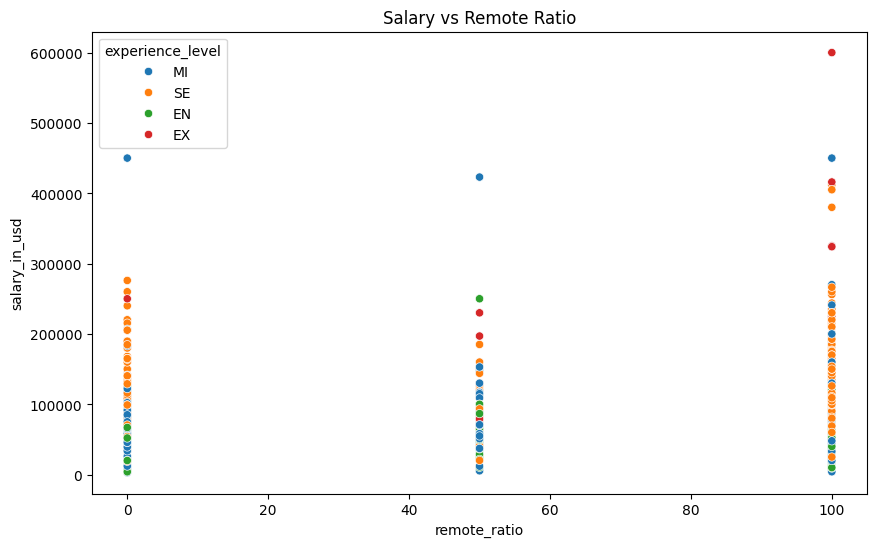

In [37]:
# Salary vs Remote Ratio
plt.figure(figsize=(10,6))
sns.scatterplot(data=salaries_df, x="remote_ratio", y="salary_in_usd", hue="experience_level")
plt.title("Salary vs Remote Ratio")
plt.show()

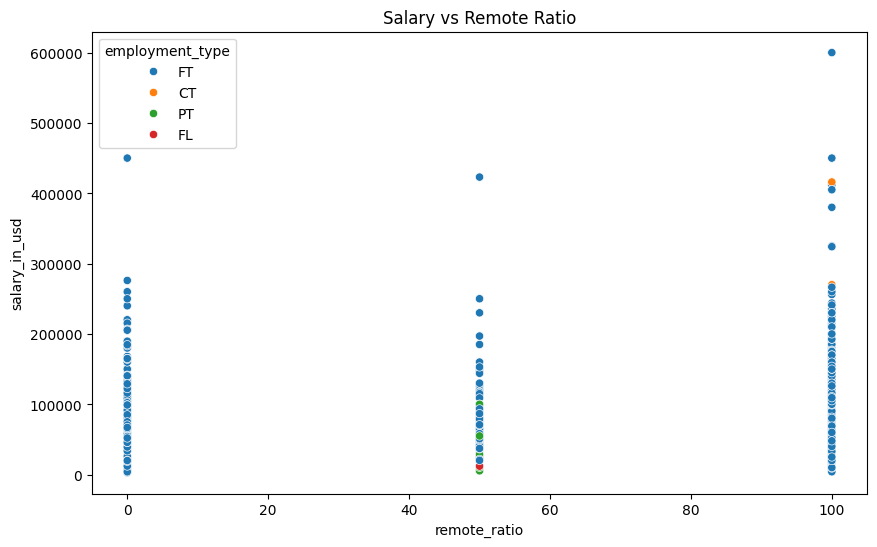

In [38]:
# Salary vs Remote Ratio
plt.figure(figsize=(10,6))
sns.scatterplot(data=salaries_df, x="remote_ratio", y="salary_in_usd", hue="employment_type")
plt.title("Salary vs Remote Ratio")
plt.show()

In [39]:
# Split salary by experience level
entry_level_salaries = salaries_df[salaries_df['experience_level'] == 'EN']['salary_in_usd']
mid_level_salaries = salaries_df[salaries_df['experience_level'] == 'MI']['salary_in_usd']
senior_level_salaries = salaries_df[salaries_df['experience_level'] == 'SE']['salary_in_usd']
executive_level_salaries = salaries_df[salaries_df['experience_level'] == 'EX']['salary_in_usd']

# t independen test
t_stat, p_value = stats.ttest_ind(mid_level_salaries, entry_level_salaries)
print(f"T-statistic MI-EN: {t_stat}, P-value MI-EN: {p_value}")
t_stat, p_value = stats.ttest_ind(senior_level_salaries, mid_level_salaries)
print(f"T-statistic SE-MI: {t_stat}, P-value SE-MI: {p_value}")
t_stat, p_value = stats.ttest_ind(executive_level_salaries, senior_level_salaries)
print(f"T-statistic EX-SE: {t_stat}, P-value EX-SE: {p_value}")

T-statistic MI-EN: 3.530936450656235, P-value MI-EN: 0.0004793707388308705
T-statistic SE-MI: 9.210292076278856, P-value SE-MI: 9.45037295337636e-19
T-statistic EX-SE: 4.584040786518666, P-value EX-SE: 6.669407142253086e-06


**MI-EN (Mid-level vs. Entry-level)**

***T-statistic: 3.53***

Perbedaan rata-rata gaji mid-level dan entry-level cukup besar relatif terhadap variasi data. Rata-rata gaji mid-level lebih tinggi daripada entry-level.

***P-value: 0.00048***

Nilai 𝑃<0.05. P<0.05, jadi perbedaan ini signifikan secara statistik.

Kesimpulan: Gaji mid-level secara nyata lebih tinggi dibandingkan entry-level.

**SE-MI (Senior-level vs. Mid-level)**

***T-statistic: 9.21***

Nilai T-statistic yang sangat besar menunjukkan perbedaan rata-rata gaji antara senior-level dan mid-level sangat signifikan. Rata-rata gaji senior-level jauh lebih tinggi dibandingkan mid-level.

***P-value: 9.45 × 10^−19 (hampir nol)***

Nilai 𝑃<0.05. P<0.05, bahkan jauh lebih kecil.

Kesimpulan: Perbedaan gaji antara senior-level dan mid-level sangat signifikan secara statistik.

**EX-SE (Executive-level vs. Senior-level)**

***T-statistic: 4.58***

Nilai T-statistic yang cukup besar menunjukkan perbedaan signifikan antara rata-rata gaji executive-level dan senior-level. Rata-rata gaji executive-level lebih tinggi dibandingkan senior-level.

***P-value: 6.67 × 10^−6***

Nilai 𝑃<0.05. P<0.05, menunjukkan perbedaan ini signifikan secara statistik.

Kesimpulan: Gaji executive-level secara nyata lebih tinggi dibandingkan senior-level.

Ada perbedaan signifikan secara statistik dalam rata-rata gaji di antara setiap pasangan tingkat pengalaman. Tingkat pengalaman yang lebih tinggi memiliki gaji yang secara konsisten lebih besar: EN < MI < SE < EX


**MI-EN (Mid-level vs. Entry-level)**

***T-statistic: 3.53***

The difference in average salaries between mid-level and entry-level positions is substantial relative to the data's variation. Mid-level salaries are higher on average compared to entry-level.

***P-value: 0.00048***

Since 𝑃<0.05, the difference is statistically significant.

Conclusion: Mid-level salaries are significantly higher than entry-level salaries.

**SE-MI (Senior-level vs. Mid-level)**

***T-statistic: 9.21***

The high T-statistic indicates a significant difference in average salaries between senior-level and mid-level positions. Senior-level salaries are much higher on average.

***P-value: 9.45 × 10^−19 (almost zero)***

With 𝑃<0.05, this difference is highly statistically significant.

Conclusion: Senior-level salaries are significantly higher than mid-level salaries.

**EX-SE (Executive-level vs. Senior-level)**

***T-statistic: 4.58***

The relatively high T-statistic suggests a significant difference in average salaries between executive-level and senior-level positions. Executive-level salaries are higher on average.

***P-value: 6.67 × 10^−6***

As 𝑃<0.05, this difference is statistically significant.

Conclusion: Executive-level salaries are significantly higher than senior-level salaries.

There are statistically significant differences in average salaries across all pairs of experience levels. Salaries consistently increase with higher experience levels: EN < MI < SE < EX

In [40]:
# Code categorical variables
df_encoded = pd.get_dummies(salaries_df, drop_first=True)

# Feature and target variable
X = df_encoded.drop("salary_in_usd", axis=1)
y = df_encoded["salary_in_usd"]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3960.1330327868855
R-squared: 0.9624915888862365


**Hasil Evaluasi Model:**

Mean Absolute Error (MAE): 3960.13

Rata-rata kesalahan prediksi model adalah sekitar 3960 USD. Ini menunjukkan bahwa prediksi model sangat dekat dengan nilai aktual, karena kesalahan relatif kecil dibandingkan skala gaji.

R-squared (R²): 0.9625

Nilai R² mendekati 1, yang berarti model mampu menjelaskan sekitar 96.25% dari variabilitas data target (gaji). Ini menunjukkan bahwa model memiliki performa yang sangat baik dalam memprediksi gaji berdasarkan fitur yang tersedia.

Interpretasi:
- Model Random Forest berhasil menangkap hubungan antara fitur dan target dengan sangat baik.
- Kesalahan prediksi kecil dan proporsi variabilitas yang dijelaskan oleh model tinggi, menandakan bahwa fitur yang digunakan cukup relevan dan model sesuai untuk masalah ini.

**Model Evaluation Results:**

Mean Absolute Error (MAE): 3960.13

The model's average prediction error is approximately 3960 USD. This indicates that the model's predictions are very close to the actual values, as the error is relatively small compared to the salary scale.

R-squared (R²): 0.9625

R² value close to 1 means the model explains about 96.25% of the variability in the target data (salaries). This demonstrates that the model performs exceptionally well in predicting salaries based on the available features.

Interpretation:
- The Random Forest model effectively captures the relationship between the features and the target variable.
- The small prediction error and high proportion of explained variability suggest that the features used are highly relevant and the model is well-suited for this task.

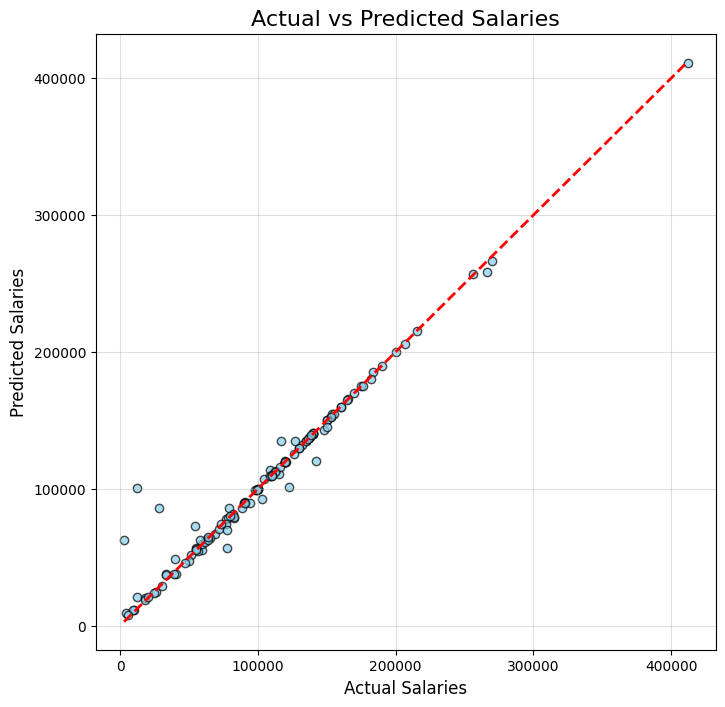

In [41]:
# Prediction Visualization (Actual vs Predicted)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Garis referensi
plt.title("Actual vs Predicted Salaries", fontsize=16)
plt.xlabel("Actual Salaries", fontsize=12)
plt.ylabel("Predicted Salaries", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

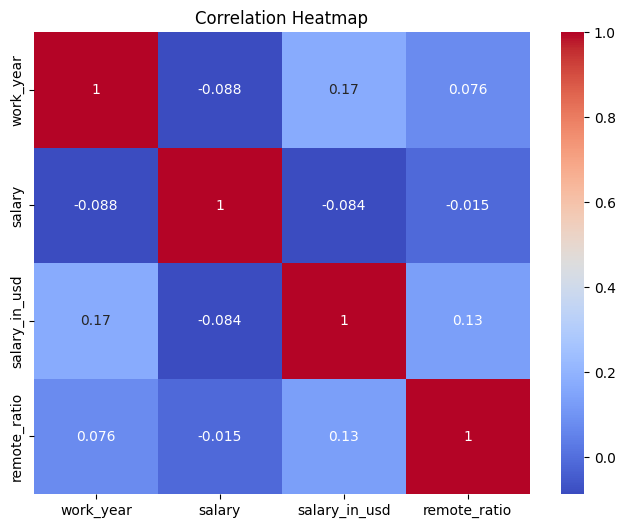

In [42]:
# Subset dataframe to numerical columns only
numerical_columns = salaries_df.select_dtypes(include=['number']).columns
correlation_matrix = salaries_df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [43]:
le = LabelEncoder()
salaries_df['experience_level'] = le.fit_transform(salaries_df['experience_level'])
salaries_df['employment_type'] = le.fit_transform(salaries_df['employment_type'])
salaries_df['job_title'] = le.fit_transform(salaries_df['job_title'])
salaries_df['employee_residence'] = le.fit_transform(salaries_df['employee_residence'])
salaries_df['company_location'] = le.fit_transform(salaries_df['company_location'])
salaries_df['company_size'] = le.fit_transform(salaries_df['company_size'])
salaries_df['salary_currency'] = le.fit_transform(salaries_df['salary_currency'])

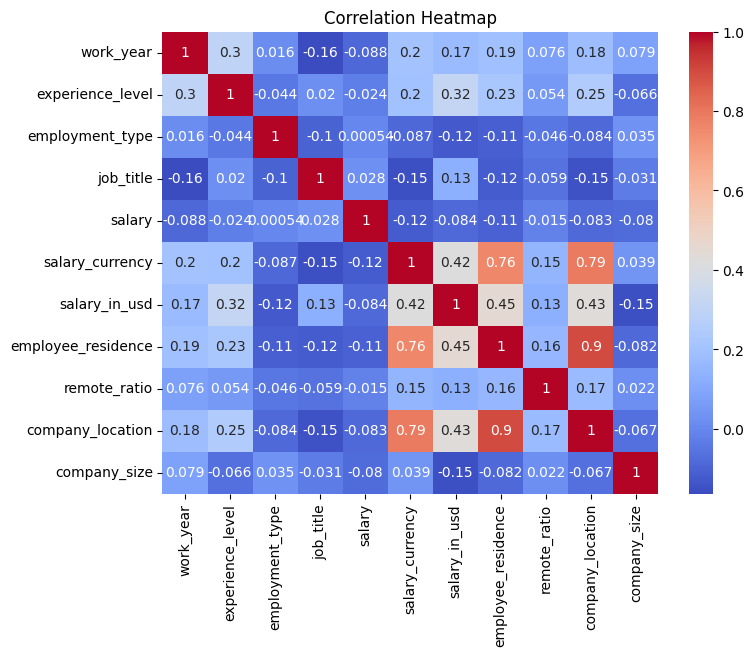

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(salaries_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()